# **Disease Prediction Model with Explainable AI (XAI)**

# **Abstract**
# ====================================
# This project builds a disease prediction model using a machine learning approach and interprets the model predictions using Explainable AI (XAI) techniques. We use the SHAP library for visual explanations of feature importance and impact.
# The dataset consists of medical features related to diabetes prediction.

# The main objectives of this notebook are:
# 1. Perform data exploration and preprocessing.
# 2. Train a Random Forest classifier for prediction.
# 3. Evaluate the model performance with appropriate metrics and visualizations.
# 4. Use SHAP values to explain the predictions and highlight feature importance.

# ====================================


# **1. Import Libraries and Load Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import shap

# **2. Dataset Overview**

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print("\nSample Data:")
print(data.head())

# Dataset information
print("\nDataset Information:")
data.info()

# Basic statistics
print("\nDataset Statistics:")
print(data.describe())



Sample Data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64 

# **3. Data Preprocessing**

In [3]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Feature-target split
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Encode labels if necessary
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **4. Model Training**

In [4]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **5. Model Evaluation**


Accuracy: 0.7207792207792207

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



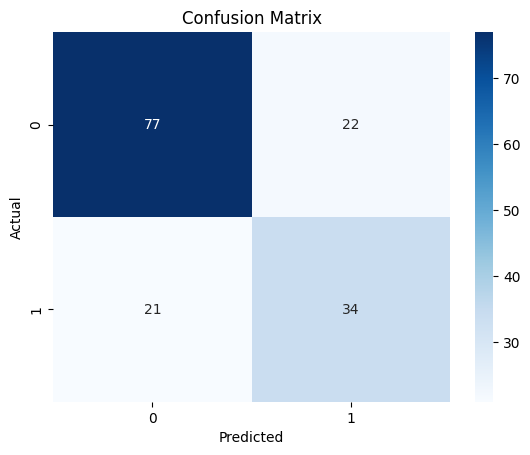

In [5]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print('\nAccuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **6. Explainable AI (XAI) - SHAP**

  0%|          | 0/50 [00:00<?, ?it/s]

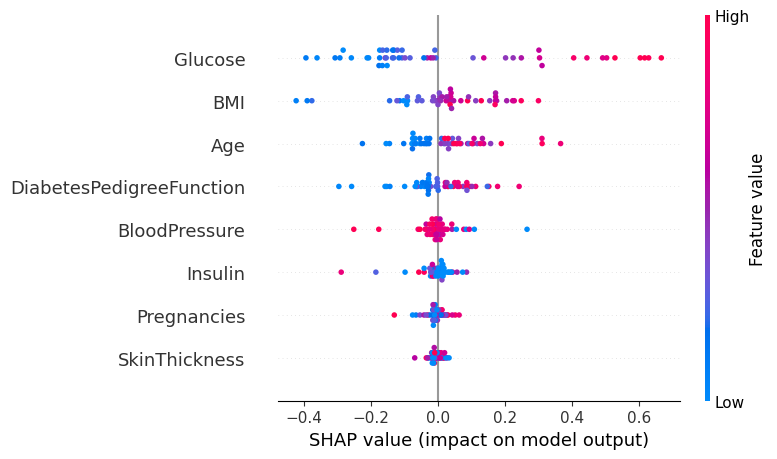

In [6]:
# Explain model predictions using SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test.iloc[:50, :])  # Limit to 50 samples for efficiency

# Visualize SHAP Summary Plot
shap.summary_plot(shap_values, X_test.iloc[:50, :])

# Force Plot for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])

# **7. Conclusion and Next Steps**

# Conclusion
# This notebook demonstrates building a disease prediction model with explainable AI techniques.
# Future improvements can include hyperparameter tuning, feature engineering, and testing on larger datasets.

